* Automating Crypto Website API Pull Using Python

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# The parameters dictionary contains the parameters for the API request.
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
#The headers dictionary contains the headers for the API request.
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}
#A Session object allows you to persist certain parameters across requests.
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973506e+07,1.973506e+07,False,NaN,1,NaN,NaN,None,2024-08-03T15:12:00.000Z,62012.268692,3.452551e+10,-22.4752,0.158289,-1.169548,-10.040742,7.823586,-11.075995,-3.205502,1.223816e+12,55.4794,1.302258e+12,None,2024-08-03T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202552e+08,1.202552e+08,True,NaN,2,NaN,NaN,None,2024-08-03T15:11:00.000Z,3000.726450,1.819065e+10,-9.9122,-0.055720,-0.450701,-9.038925,-3.841242,-20.616527,-4.703027,3.608529e+11,16.3606,3.608529e+11,None,2024-08-03T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
2,825,Tether USDt,USDT,tether,93461,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145427e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-03T15:11:00.000Z,0.999362,6.313252e+10,-8.9184,-0.002852,0.036154,-0.079401,0.010582,-0.060335,-0.073940,1.144696e+11,5.1899,1.169934e+11,None,2024-08-03T15:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-03 15:14:27.811247
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459372e+08,1.459372e+08,False,NaN,4,NaN,NaN,None,2024-08-03T15:11:00.000Z,542.920586,1.911975e+09,-7.2667,0.069792,-1.568655,-7.533262,4.151273,-17.864230,-8.168873,7.923231e+10,3.5923,7.923231e+10,None,2024-08-03T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.653870e+08,5.814996e+08,True,NaN,5,NaN,NaN,None,2024-08-03T15:11:00.000Z,151.664636,3.797838e+09,-14.4639,-0.304020,-2.887334,-17.578373,12.723835,-8.541146,2.967763,7.058275e+10,3.2001,8.819293e+10,None,2024-08-03T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
5,3408,USDC,USDC,usd-coin,21298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.306437e+10,3.306437e+10,False,NaN,6,NaN,NaN,None,2024-08-03T15:11:00.000Z,0.999998,6.658483e+09,-16.7166,-0.001762,0.000229,-0.004048,0.001383,-0.006344,-0.000287,3.306431e+10,1.4991,3.306431e+10,None,2024-08-03T15:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-03 15:14:27.811247
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-03T15:12:00.000Z,0.567465,1.361268e+09,-30.3689,-0.646163,2.364934,-5.378526,27.415293,7.801441,7.181570,3.177761e+10,1.4399,5.674645e+10,None,2024-08-03T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453829e+11,1.453829e+11,True,NaN,8,NaN,NaN,None,2024-08-03T15:12:00.000Z,0.113489,7.686643e+08,-13.5297,-0.097477,1.326849,-15.910550,4.437848,-28.722958,-29.276073,1.649938e+10,0.7476,1.649938e+10,None,2024-08-03T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:14:27.811247
8,11419,Toncoin,TON,toncoin,487,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN

In [24]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # The parameters dictionary contains the parameters for the API request.
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    #The headers dictionary contains the headers for the API request.
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    #A Session object allows you to persist certain parameters across requests.
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    # here we append the new created data frame to the original data frame.
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    #save the data into a csv file(the following code is incase we wanna save the data to a csv file and append into it)
    #if not os.path.isfile(r'C:\Users\HP\OneDrive\Desktop\Tutorial\Python Tutorial\2. Automating Crypto Website API Pull Using Python\API.csv'):# this will check if the file existed if not it will creat one.
    #    df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Tutorial\Python Tutorial\2. Automating Crypto Website API Pull Using Python\API.csv', header = 'column_names')
    #else:   
    #   df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Tutorial\Python Tutorial\2. Automating Crypto Website API Pull Using Python\API.csv', mode = 'a', header = False)# a means append, header false means we do not need to append data with headers again.

In [25]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)# the for loop will be run each 60 seconds.
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [11]:
pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Tutorial\Python Tutorial\2. Automating Crypto Website API Pull Using Python\API.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.973502e+07,1.973502e+07,False,NaN,1,NaN,NaN,NaN,2024-08-03T13:19:00.000Z,61901.706885,4.055604e+10,-2.2057,-0.075293,-4.485236,-10.136972,8.369492,-10.563515,-3.126889,1.221632e+12,55.4211,1.299936e+12,NaN,2024-08-03T13:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
1,1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202552e+08,1.202552e+08,True,NaN,2,NaN,NaN,NaN,2024-08-03T13:18:00.000Z,3002.666863,2.113151e+10,11.5241,0.121795,-4.711226,-9.329283,-3.923906,-20.395800,-4.291314,3.610862e+11,16.3853,3.610862e+11,NaN,2024-08-03T13:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
2,2,825,Tether USDt,USDT,tether,93459,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.145427e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-03T13:18:00.000Z,0.999269,7.157865e+10,9.6968,-0.010264,-0.011803,-0.084912,-0.019209,-0.044259,-0.090890,1.144589e+11,5.1939,1.169825e+11,NaN,2024-08-03T13:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-03 13:20:21.498098
3,3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459372e+08,1.459372e+08,False,NaN,4,NaN,NaN,NaN,2024-08-03T13:18:00.000Z,541.554760,2.030628e+09,-1.9614,0.046404,-5.411507,-8.193595,4.940569,-16.533134,-7.605615,7.903299e+10,3.5863,7.903299e+10,NaN,2024-08-03T13:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
4,4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.653874e+08,5.814999e+08,True,NaN,5,NaN,NaN,NaN,2024-08-03T13:18:00.000Z,151.817892,4.393061e+09,3.9839,-0.364348,-7.028943,-18.721650,14.514682,-8.321625,3.950259,7.065414e+10,3.2061,8.828209e+10,NaN,2024-08-03T13:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
5,5,3408,USDC,USDC,usd-coin,21297,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.305944e+10,3.305944e+10,False,NaN,6,NaN,NaN,NaN,2024-08-03T13:18:00.000Z,0.999942,7.703797e+09,4.8657,-0.013435,-0.011613,-0.006087,-0.024555,-0.006416,-0.010020,3.305752e+10,1.5001,3.305752e+10,NaN,2024-08-03T13:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-03 13:20:21.498098
6,6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,NaN,2024-08-03T13:19:00.000Z,0.569136,1.544105e+09,-20.8587,-0.358756,-0.422639,-5.975250,28.754047,8.498839,7.858289,3.187119e+10,1.4462,5.691356e+10,NaN,2024-08-03T13:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
7,7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.453817e+11,1.453817e+11,True,NaN,8,NaN,NaN,NaN,2024-08-03T13:19:00.000Z,0.113075,8.651596e+08,1.3264,0.074834,-3.783569,-17.005514,6.038652,-28.847946,-29.481176,1.643900e+10,0.7460,1.643900e+10,NaN,2024-08-03T13:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 13:20:21.498098
8,8,11419,Toncoin,TON,toncoin,487,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19735059.00000,19735059.00000,False,NaN,1,NaN,NaN,None,2024-08-03T15:43:00.000Z,61320.86418,33258996160.52995,-25.27050,-1.19094,-2.88788,-10.85552,6.53982,-12.61231,-4.70405,1210170872424.88208,55.45510,1287738147675.29004,None,2024-08-03T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:44:29.894944,NaT
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120255176.29602,120255176.29602,True,NaN,2,NaN,NaN,None,2024-08-03T15:42:00.000Z,2969.93585,17189932444.82347,-18.19960,-1.24056,-1.89275,-9.63558,-4.87878,-21.88499,-5.88167,357150159582.18860,16.36950,357150159582.19000,None,2024-08-03T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:44:29.894944,NaT
2,825,Tether USDt,USDT,tether,93462,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114542666302.87727,117068083203.71024,True,NaN,3,NaN,NaN,None,2024-08-03T15:42:00.000Z,0.99940,60581381625.13857,-13.95630,-0.00096,0.02554,-0.08627,0.01274,-0.05466,-0.07019,114473396969.67476,5.24670,116997286632.23000,None,2024-08-03T15:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-03 15:44:29.894944,NaT
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937202.56487,145937202.56487,False,NaN,4,NaN,NaN,None,2024-08-03T15:42:00.000Z,535.24781,1864137317.42236,-10.81720,-1.58422,-3.74101,-8.36151,2.81702,-19.34840,-9.52083,78112567466.05829,3.58020,78112567466.06000,None,2024-08-03T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:44:29.894944,NaT
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465386728.45385,581499547.53824,True,NaN,5,NaN,NaN,None,2024-08-03T15:42:00.000Z,148.69145,3570577735.40798,-21.74860,-2.44840,-4.68724,-18.49797,10.90693,-10.75083,0.96734,69199025641.39992,3.17160,86464008619.77000,None,2024-08-03T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:44:29.894944,NaT
5,3408,USDC,USDC,usd-coin,21299,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33065101495.23913,33065101495.23913,False,NaN,6,NaN,NaN,None,2024-08-03T15:42:00.000Z,1.00000,6295233485.86936,-22.90430,0.00099,-0.00498,-0.02313,-0.00176,-0.00877,-0.00368,33065221954.36136,1.51550,33065221954.36000,None,2024-08-03T15:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-03 15:44:29.894944,NaT
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-03T15:43:00.000Z,0.56061,1287779195.60584,-36.39260,-1.65675,0.35850,-6.32603,26.58489,6.18547,5.55022,31393694162.59607,1.43890,56060884976.01000,None,2024-08-03T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:44:29.894944,NaT
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145383216383.70520,145383216383.70520,True,NaN,8,NaN,NaN,None,2024-08-03T15:43:00.000Z,0.11166,734150732.06924,-19.79560,-1.90432,-1.21807,-17.00546,2.14527,-30.22027,-30.89969,16232836435.26721,0.744

In [28]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.19094,-2.88788,-10.85552,6.53982,-12.61231,-4.70405
Ethereum,-1.24056,-1.89275,-9.63558,-4.87878,-21.88499,-5.88167
Tether USDt,-0.00096,0.02554,-0.08627,0.01274,-0.05466,-0.07019
BNB,-1.58422,-3.74101,-8.36151,2.81702,-19.34840,-9.52083
Solana,-2.44840,-4.68724,-18.49797,10.90693,-10.75083,0.96734
USDC,0.00099,-0.00498,-0.02313,-0.00176,-0.00877,-0.00368
XRP,-1.65675,0.35850,-6.32603,26.58489,6.18547,5.55022
Dogecoin,-1.90432,-1.21807,-17.00546,2.14527,-30.22027,-30.89969
Toncoin,-0.71465,-5.02206,-8.61884,-15.16841,-12.83632,2.14648


In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.23919
              quote.USD.percent_change_24h    -1.60619
              quote.USD.percent_change_7d    -10.09599
              quote.USD.percent_change_30d     7.62232
              quote.USD.percent_change_60d   -11.51947
              quote.USD.percent_change_90d    -3.56586
Ethereum      quote.USD.percent_change_1h     -0.31745
              quote.USD.percent_change_24h    -0.05870
              quote.USD.percent_change_7d     -8.98447
              quote.USD.percent_change_30d    -3.96185
              quote.USD.percent_change_60d   -20.96424
              quote.USD.percent_change_90d    -4.99493
Tether USDt   quote.USD.percent_change_1h      0.00411
              quote.USD.percent_change_24h     0.04678
              quote.USD.percent_change_7d     -0.07110
              quote.USD.percent_change_30d    -0.02748
              quote.USD.percent_change_60d    -0.05931
              quote.US

In [18]:
type(df4)

pandas.core.series.Series

In [29]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.23919
             quote.USD.percent_change_24h  -1.60619
             quote.USD.percent_change_7d  -10.09599
             quote.USD.percent_change_30d   7.62232
             quote.USD.percent_change_60d -11.51947
             quote.USD.percent_change_90d  -3.56586
Ethereum     quote.USD.percent_change_1h   -0.31745
             quote.USD.percent_change_24h  -0.05870
             quote.USD.percent_change_7d   -8.98447
             quote.USD.percent_change_30d  -3.96185
             quote.USD.percent_change_60d -20.96424
             quote.USD.percent_change_90d  -4.99493
Tether USDt  quote.USD.percent_change_1h    0.00411
             quote.USD.percent_change_24h   0.04678
             quote.USD.percent_change_7d   -0.07110
             quote.USD.percent_change_30d  -0.02748
             quote.USD.percent_change_60d  -0.05931
             quote.USD.percent_change_90d  -0.07831
BNB          quote.USD.percent_change_1h   -0.13946
             quote.USD.percent_change_24h  -1.51053
             quote.USD.percent_change_7d   -7.53501
             quote.USD.percent_change_30d   3.95554
             quote.USD.percent_change_60d -17.90638
             quote.USD.percent_change_90d  -8.38227
Solana       quote.USD.percent_change_1h   -0.43112
             quote.USD.percent_change_24h  -2.12157
             quote.USD.percent_change_7d  -17.53748
             quote.USD.percent_change_30d  12.41455
             quote.USD.percent_change_60d  -8.92555
             quote.USD.percent_change_90d   2.55217
USDC         quote.USD.percent_change_1h    0.00783
             quote.USD.percent_change_24h   0.01652
             quote.USD.percent_change_7d    0.00179
             quote.USD.percent_change_30d  -0.04594
             quote.USD.percent_change_60d  -0.03259
             quote.USD.percent_change_90d   0.00143
XRP          quote.USD.percent_change_1h   -0.67692
             quote.USD.percent_change_24h   2.69544
             quote.USD.percent_change_7d   -5.24464
             quote.USD.percent_change_30d  27.37766
             quote.USD.percent_change_60d   7.34141
             quote.USD.percent_change_90d   6.96890
Dogecoin     quote.USD.percent_change_1h   -0.29626
             quote.USD.percent_change_24h   1.81550
             quote.USD.percent_change_7d  -16.00509
             quote.USD.percent_change_30d   4.22205
             quote.USD.percent_change_60d -29.02507
             quote.USD.percent_change_90d -29.63259
Toncoin      quote.USD.percent_change_1h   -0.14831
             quote.USD.percent_change_24h  -4.24505
             quote.USD.percent_change_7d   -8.16359
             quote.USD.percent_change_30d -14.72949
             quote.USD.percent_change_60d -12.18985
             quote.USD.percent_change_90d   4.05118
Cardano      quote.USD.percent_change_1h   -0.39495
             quote.USD.percent_change_24h   2.02375
             quote.USD.percent_change_7d  -12.90318
             quote.USD.percent_change_30d  -3.70911
             quote.USD.percent_change_60d -19.65179
             quote.USD.percent_change_90d -20.31735
TRON         quote.USD.percent_change_1h   -0.07678
             quote.USD.percent_change_24h   0.61149
             quote.USD.percent_change_7d   -8.87992
             quote.USD.percent_change_30d  -0.72536
             quote.USD.percent_change_60d   9.60042
             quote.USD.percent_change_90d   3.11271
Avalanche    quote.USD.percent_change_1h   -0.80096
             quote.USD.percent_change_24h   1.16910
             quote.USD.percent_change_7d  -17.90506
             quote.USD.percent_change_30d  -5.89832
             quote.USD.percent_change_60d -32.82681
             quote.USD.percent_change_90d -36.06750
Shiba Inu    quote.USD.percent_change_1h   -0.23909
             quote.USD.percent_change_24h  -0.32722
             quote.USD.percent_change_7d  -14.41825
             quote.USD.percent_change_30d

In [30]:
df5.count()

values    90
dtype: int64

In [31]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23919
1,Bitcoin,quote.USD.percent_change_24h,-1.60619
2,Bitcoin,quote.USD.percent_change_7d,-10.09599
3,Bitcoin,quote.USD.percent_change_30d,7.62232
4,Bitcoin,quote.USD.percent_change_60d,-11.51947
5,Bitcoin,quote.USD.percent_change_90d,-3.56586
6,Ethereum,quote.USD.percent_change_1h,-0.31745
7,Ethereum,quote.USD.percent_change_24h,-0.05870
8,Ethereum,quote.USD.percent_change_7d,-8.98447
9,Ethereum,quote.USD.percent_change_30d,-3.96185


In [32]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23919
1,Bitcoin,quote.USD.percent_change_24h,-1.60619
2,Bitcoin,quote.USD.percent_change_7d,-10.09599
3,Bitcoin,quote.USD.percent_change_30d,7.62232
4,Bitcoin,quote.USD.percent_change_60d,-11.51947
5,Bitcoin,quote.USD.percent_change_90d,-3.56586
6,Ethereum,quote.USD.percent_change_1h,-0.31745
7,Ethereum,quote.USD.percent_change_24h,-0.05870
8,Ethereum,quote.USD.percent_change_7d,-8.98447
9,Ethereum,quote.USD.percent_change_30d,-3.96185


In [33]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.23919
1,Bitcoin,24h,-1.60619
2,Bitcoin,7d,-10.09599
3,Bitcoin,30d,7.62232
4,Bitcoin,60d,-11.51947
5,Bitcoin,90d,-3.56586
6,Ethereum,1h,-0.31745
7,Ethereum,24h,-0.05870
8,Ethereum,7d,-8.98447
9,Ethereum,30d,-3.96185


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

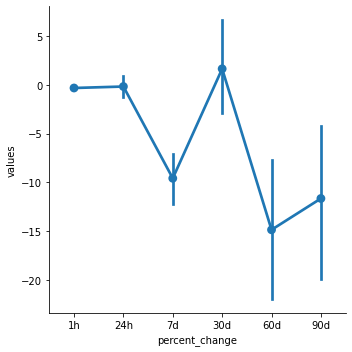

In [35]:
sns.catplot(x = 'percent_change', y = 'values', data = df7, kind = 'point')

In [37]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'") 
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61320.86418,2024-08-03 15:44:29.894944
0,Bitcoin,61320.86418,NaT


ValueError: cannot reindex from a duplicate axis

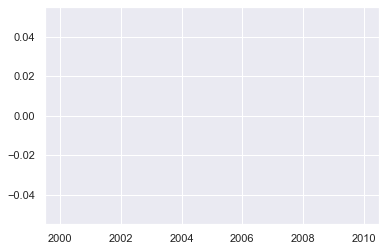

In [39]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)